In [41]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

# 读入数据集
df = pd.read_csv('./train.csv')
print(df.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [31]:
#设置日期格式
df['datetime']=pd.to_datetime(df.Datetime)
#删掉多于列
df2=df.drop(['Datetime','ID'],1).set_index('datetime')
print(df2.head())

                     Count
datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2


In [35]:
#按照天重新采样
df_day=df2.resample('D').sum()
df_day['ds']=df_day.index
df_day['y']=df_day.Count
df_day.drop(['Count'],1,inplace=True)
print(df_day.head())

                   ds    y
datetime                  
2012-01-09 2012-01-09  112
2012-01-10 2012-01-10  248
2012-01-11 2012-01-11  304
2012-01-12 2012-01-12  210
2012-01-13 2012-01-13    0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds         yhat   yhat_lower    yhat_upper
1274 2015-07-06  7265.490155  4180.448020   9993.956171
1275 2015-07-07  7498.619098  4762.749505  10538.209542
1276 2015-07-08  7398.588745  4703.598786  10113.830798
1277 2015-07-09  7479.552310  4702.083149  10029.179687
1278 2015-07-10  7212.641859  4671.896271   9871.453961


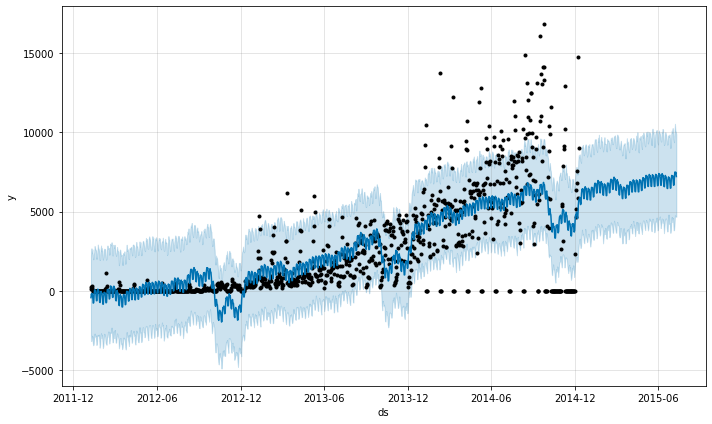

In [38]:
# 拟合模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(df_day)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
# 预测数据集
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 展示预测结果
m.plot(forecast)
plt.show()

In [39]:
#print(forecast)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1274,2015-07-06,6796.445992,4180.448020,9993.956171,6536.180274,7031.247009,469.044163,469.044163,469.044163,119.868042,119.868042,119.868042,349.176120,349.176120,349.176120,0.0,0.0,0.0,7265.490155
1275,2015-07-07,6800.308900,4762.749505,10538.209542,6538.807848,7037.361205,698.310198,698.310198,698.310198,322.220510,322.220510,322.220510,376.089689,376.089689,376.089689,0.0,0.0,0.0,7498.619098
1276,2015-07-08,6804.171808,4703.598786,10113.830798,6541.453805,7043.475401,594.416938,594.416938,594.416938,193.590255,193.590255,193.590255,400.826682,400.826682,400.826682,0.0,0.0,0.0,7398.588745
1277,2015-07-09,6808.034716,4702.083149,10029.179687,6544.127501,7049.016395,671.517594,671.517594,671.517594,248.842266,248.842266,248.842266,422.675328,422.675328,422.675328,0.0,0.0,0.0,7479.552310
1278,2015-07-10,6811.897624,4671.896271,9871.453961,6546.451333,7053.716912,400.744235,400.744235,400.744235,-40.257263,-40.257263,-40.257263,441.001498,441.001498,441.001498,0.0,0.0,0.0,7212.641859


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


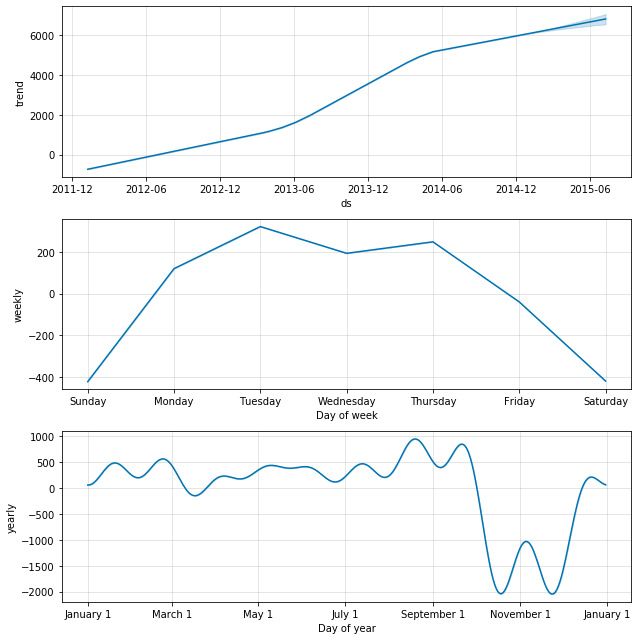

In [40]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
m.plot_components(forecast)
print(forecast.columns)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds  cap
0    2012-01-09  8.5
1    2012-01-10  8.5
2    2012-01-11  8.5
3    2012-01-12  8.5
4    2012-01-13  8.5
...         ...  ...
2887 2019-12-05  8.5
2888 2019-12-06  8.5
2889 2019-12-07  8.5
2890 2019-12-08  8.5
2891 2019-12-09  8.5

[2892 rows x 2 columns]


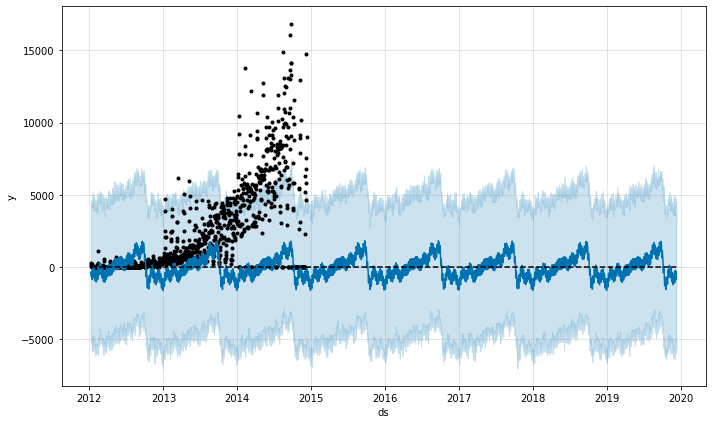

In [43]:
# 饱和增长
df_day['cap'] = 8.5
model = Prophet(growth='logistic')
model.fit(df_day)

# 预测未来 3 年的数据
future = model.make_future_dataframe(periods=1826)
# 将未来的承载能力设定得和历史数据一样
future['cap'] = 8.5
fcst = model.predict(future)
fig = model.plot(fcst)
print(future)

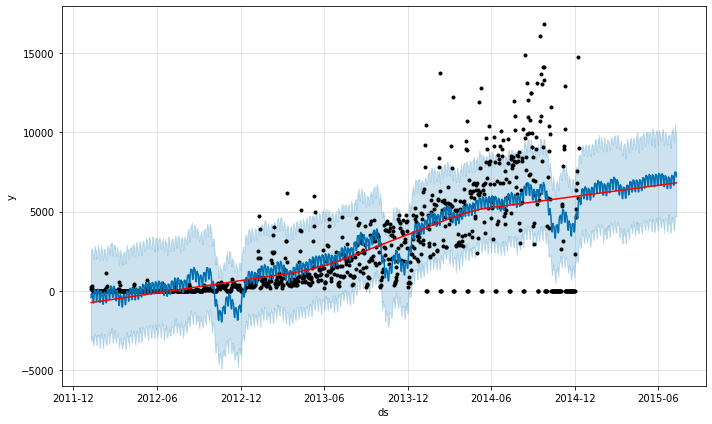

In [44]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
# plt.gca()获得当前的Axes对象ax
# 获取显著的突变点的位置
a = add_changepoints_to_plot(fig.gca(), model, forecast)
print(model)